# Laboratorul 3

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Înregistrați-vă în timp ce spuneți, pe rând, vocalele „a, e, i, o, u”  și deschideți fișierul în [Audacity](https://www.audacityteam.org/) pentru a putea vedea spectrograma (sau folosiți o aplicație de telefon care vă poate afișa spectrograma în timp real, cum ar fi [Spectroid](https://play.google.com/store/apps/details?id=org.intoorbit.spectrum&hl=en) pentru Android sau [Audio Spectrum Analyzer](https://apps.apple.com/us/app/audio-spectrum-analyzer-db-rta/id1281873790) pentru iOS). Puteți distinge diferitele vocale pe baza ei?

**Încărcați în Teams o captură de ecran cu spectrograma respectivă** (fie din Audacity dacă lucrați pe calculator, fie din aplicația de telefon).

## Exercițiul 2

Frecvențele emise de un contrabas se încadrează între 40Hz și 200Hz.

Care este **frecvența minimă** cu care trebuie eșantionat semnalul provenit din înregistrarea instrumentului, astfel încât semnalul discretizat să conțină toate componentele de frecvență pe care instrumentul le poate produce?

In [2]:
#conform Nyquist frecventa minima de esantionare este de 2 ori mai mare decat frecventa maxima a semnalului
max_freq=max(40, 200)
max_sampling_freq=2*max_freq
print(max_sampling_freq)

400


## Exercițiul 3

Construiți un semnal sinusoidal de frecvență aleasă de voi, de amplitudine unitară și fază nulă. Realizați un grafic care să arăte că eșantionarea lui cu o **frecvență sub-Nyquist** (aleasă, de asemenea, de voi) generează fenomenul de aliere.

În acest scop, generați alte două semnale sinusoidale (cu frecvențe fundamentale _diferite_ față de cea a semnalului inițial) care eșantionate cu frecvența aleasă mai sus produc **aceleași eșantioane** ca semnalul inițial. Ar trebui să obțineți o situație similară cu cea din Figura 2 din PDF.

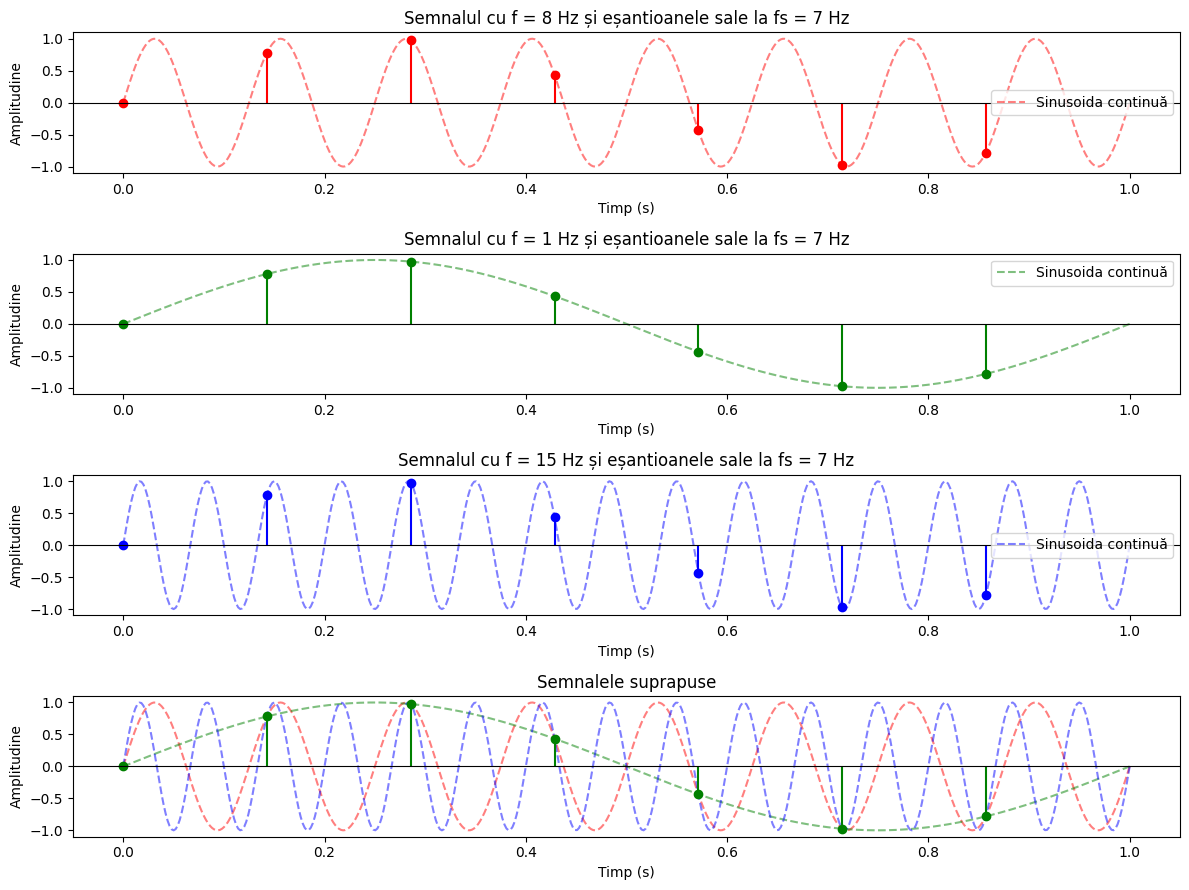

In [10]:
duration = 1  

fs_course = 7  # frecvența de eșantionare  
T_course = 1 / fs_course  # perioada de eșantionare

# Generăm vectorul de timp și semnalele
n = np.arange(0, duration, T_course)
x_course_8Hz = np.sin(2 * np.pi * 8 * n)
x_course_1Hz = np.sin(2 * np.pi * 1 * n)
x_course_15Hz = np.sin(2 * np.pi * 15 * n)

# Generăm semnalele sinusoidale continue pentru frecvențele 1, 8 și 15 Hz
# pentru ca avem frecventa de esantionare din formula f0 = fx - k*fs  
t_continuous = np.linspace(0, duration, 500)  # vector timp 
x_continuous_1Hz = np.sin(2 * np.pi * 1 * t_continuous)
x_continuous_8Hz = np.sin(2 * np.pi * 8 * t_continuous)
x_continuous_15Hz = np.sin(2 * np.pi * 15 * t_continuous)

plt.figure(figsize=(12, 9))

plt.subplot(4, 1, 1)
plt.plot(t_continuous, x_continuous_8Hz, 'r--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n, x_course_8Hz, 'r', markerfmt='ro', basefmt=" ", linefmt='r')
plt.title('Semnalul cu f = 8 Hz și eșantioanele sale la fs = 7 Hz')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t_continuous, x_continuous_1Hz, 'g--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n, x_course_1Hz, 'g', markerfmt='go', basefmt=" ", linefmt='g')
plt.title('Semnalul cu f = 1 Hz și eșantioanele sale la fs = 7 Hz')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t_continuous, x_continuous_15Hz, 'b--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n, x_course_15Hz, 'b', markerfmt='bo', basefmt=" ", linefmt='b')
plt.title('Semnalul cu f = 15 Hz și eșantioanele sale la fs = 7 Hz')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t_continuous, x_continuous_8Hz, 'r--', alpha=0.5, label='Sinusoida continuă')
plt.plot(t_continuous, x_continuous_1Hz, 'g--', alpha=0.5, label='Sinusoida continuă')
plt.plot(t_continuous, x_continuous_15Hz, 'b--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n, x_course_1Hz, 'g', markerfmt='go', basefmt=" ", linefmt='g')
plt.title('Semnalele suprapuse')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

## Exercițiul 4

Eșantionați încă o dată semnalele de la exercițiul anterior, de data aceasta alegând o frecvență de eșantionare **mai mare decât frecvența Nyquist**, astfel încât să nu mai obțineți fenomenul de aliere. Reprezentați-le grafic pentru a demonstra că nu mai are loc alierea.

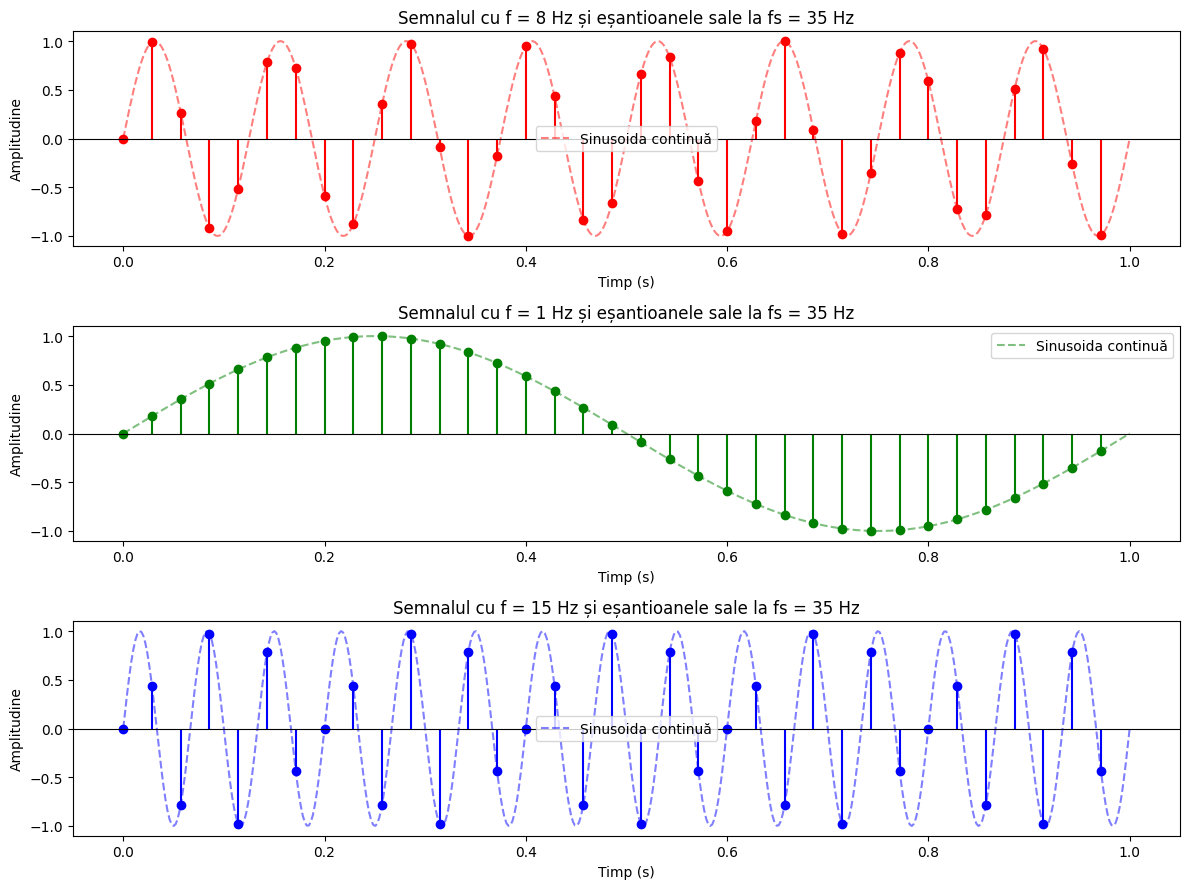

In [11]:

duration = 1   

# Alegem o frecvență de eșantionare mai mare decât frecvența Nyquist pentru cel mai rapid semnal (f = 15 Hz)
fs_nyquist = 2 * 15  # frecvența Nyquist
fs_greater_nyquist = fs_nyquist + 5   
T_greater_nyquist = 1 / fs_greater_nyquist  # noua perioadă de eșantionare

n_greater = np.arange(0, duration, T_greater_nyquist)
x_greater_8Hz = np.sin(2 * np.pi * 8 * n_greater)
x_greater_1Hz = np.sin(2 * np.pi * 1 * n_greater)
x_greater_15Hz = np.sin(2 * np.pi * 15 * n_greater)

t_continuous = np.linspace(0, duration, 500)   
x_continuous_1Hz = np.sin(2 * np.pi * 1 * t_continuous)
x_continuous_8Hz = np.sin(2 * np.pi * 8 * t_continuous)
x_continuous_15Hz = np.sin(2 * np.pi * 15 * t_continuous)

plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t_continuous, x_continuous_8Hz, 'r--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n_greater, x_greater_8Hz, 'r', markerfmt='ro', basefmt=" ", linefmt='r')
plt.title(f'Semnalul cu f = 8 Hz și eșantioanele sale la fs = {fs_greater_nyquist} Hz')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_continuous, x_continuous_1Hz, 'g--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n_greater, x_greater_1Hz, 'g', markerfmt='go', basefmt=" ", linefmt='g')
plt.title(f'Semnalul cu f = 1 Hz și eșantioanele sale la fs = {fs_greater_nyquist} Hz')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_continuous, x_continuous_15Hz, 'b--', alpha=0.5, label='Sinusoida continuă')
plt.stem(n_greater, x_greater_15Hz, 'b', markerfmt='bo', basefmt=" ", linefmt='b')
plt.title(f'Semnalul cu f = 15 Hz și eșantioanele sale la fs = {fs_greater_nyquist} Hz')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()

plt.tight_layout()
plt.show()